In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/fake product review.csv')
data

,Unnamed: 0,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,...,6.0,4.0,3.0,2.0,2.0,1.0,9.0,0.706522,13.0,1
1,1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,...,10.0,4.0,7.0,2.0,2.0,1.0,6.0,0.666667,16.0,1
2,2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,...,3.0,4.0,7.0,1.0,2.0,0.0,9.0,0.735294,22.0,1
3,3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,...,6.0,4.0,8.0,1.0,2.0,2.0,5.0,0.687500,22.0,1
4,4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,...,4.0,2.0,9.0,2.0,1.0,1.0,3.0,0.731343,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9433,9433,Reviewed in India on 24 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Good,Jayaraj,5,I have using all products of one plus,0,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,29.0,1
9434,9434,Reviewed in India on 6 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Go for it excellent quality,Santosh yadav,5,Everything is excellent but jio cinema not a...,0,0.400000,0.700000,...,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.071429,24.0,0
9435,9435,Reviewed in India on 14 July 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Excellent,Stanley Vaz,5,Excellent,0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,30.0,0
9436,9436,Reviewed in India on 1 February 2021,https://www.amazon.in/OnePlus-inches-Ready-And...,Niceeeee,Tanu,4,I liked this,0,0.600000,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,30.0,0


In [ ]:
print(data["Rev_Type"].head(10))

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    0
8    0
9    1
Name: Rev_Type, dtype: int64


In [ ]:
#================== PREPROCESSING =============================

#=== checking missing values ===

print("-----------------------------------------")
print("========= Checking missing values  ======")
print("-----------------------------------------")
print(data.isnull().sum())
print()

data.drop_duplicates(inplace = True)



-----------------------------------------
========= Checking missing values  ======
-----------------------------------------
Unnamed: 0        0
Date              0
URL               0
Review_Title      0
Author            0
Rating            0
Review_text       0
Review_helpful    0
Sentiment         0
Subjectivity      0
Neg_Count         0
Word_Count        0
Unique_words      0
Noun_Count        0
Adj_Count         0
Verb_Count        0
Adv_Count         0
Pro_Count         0
Pre_Count         0
Con_Count         0
Art_Count         0
Nega_Count        0
Aux_Count         0
Authenticity      0
AT                0
Rev_Type          0
dtype: int64



In [ ]:
#========================= NLP TECHNIQUES ============================

#=== TEXT CLEANING ====
import re

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    return sentence


print("----------------------------------------------")
print("============ Before Applying NLP  ============")
print("----------------------------------------------")
print()
print(data['Review_text'].head(10))

print("----------------------------------------------")
print("============ After Applying NLP  =============")
print("----------------------------------------------")
print()

data["Summary_Clean"] = data["Review_text"].apply(cleanup)
data["URL"] = data["URL"].apply(cleanup)

print(data["Summary_Clean"].head(10))






----------------------------------------------
============ Before Applying NLP  ============
----------------------------------------------

0      A really awesome keyboard  i was actually go...
1      I know its costly but its worth your money  ...
2      I had been contemplating to buy this for a l...
3      SO   Very very small keys  For fast typers w...
4      Good to use keyboard while it is new  but it...
5      Have always used a Logitech as my keyboard f...
6      The short review  The Logitech G     membran...
7      Pros  cheaper than most other high end keybo...
8      This is a terrible product by Logitech  I am...
9      Pros    Dedicated media keys and Windows tog...
Name: Review_text, dtype: object
----------------------------------------------
============ After Applying NLP  =============
----------------------------------------------

0      a really awesome keyboard  i was actually go...
1      i know its costly but its worth your money  ...
2      i had been conte

In [ ]:
#==== stop words ====

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
stop_words = stopwords.words('english')
stemmer    = nltk.SnowballStemmer("english")
stop_words = stopwords.words('english')


def clean_data(text1):
    text1 = str(text1).lower()
    text1 = re.sub('\[.*?\]', '', text1)
    text1 = re.sub('https?://\S+|www\.\S+', '', text1) # remove urls
    text1 = re.sub('<.*?>+', '', text1)
    text1 = re.sub('[%s]' % re.escape(string.punctuation), '', text1) # remove punctuation
    text1 = re.sub('\n', '', text1)
    text1 = re.sub('\w*\d\w*', '', text1)
    return text1
def preprocess_data(text):
    text = clean_data(text)                                                     # Clean puntuation, urls, and so on
    text = ' '.join(word for word in text.split() if word not in stop_words)    # Remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split())                # Stemm all the words in the sentence
    return text

print("===================================================")
print("                Before Applying NLP                ")
print("===================================================")
print()
print(data['Review_text'].head(10))

print("===================================================")
print("             After Applying NLP                    ")
print("===================================================")
print()
data["Clean"] = data["Review_text"].apply(preprocess_data)

print(data["Clean"].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                Before Applying NLP                

0      A really awesome keyboard  i was actually go...
1      I know its costly but its worth your money  ...
2      I had been contemplating to buy this for a l...
3      SO   Very very small keys  For fast typers w...
4      Good to use keyboard while it is new  but it...
5      Have always used a Logitech as my keyboard f...
6      The short review  The Logitech G     membran...
7      Pros  cheaper than most other high end keybo...
8      This is a terrible product by Logitech  I am...
9      Pros    Dedicated media keys and Windows tog...
Name: Review_text, dtype: object
             After Applying NLP                    

0    realli awesom keyboard actual go cheap game ke...
1    know cost worth money logitech known brand pro...
2    contempl buy long time went numer review compa...
3    small key fast typer use hand type abl use typ...
4    good use keyboard new difficult possibl clean ...
5    alway use logitech keyboard yea

In [ ]:
#================= VECTORIZATION ================================
from sklearn.feature_extraction.text import CountVectorizer
X = data["Summary_Clean"]
y = data['Rev_Type']
vector = CountVectorizer(stop_words = 'english', lowercase = True)

#fitting the data
training_data = vector.fit_transform(X)

#tranform the test data

print("==============================================")
print("---------------- Vectorization --------------")
print("==============================================")
print()
print(training_data)

---------------- Vectorization --------------

  (0, 6943)	1
  (0, 671)	1
  (0, 4687)	4
  (0, 124)	1
  (0, 3711)	1
  (0, 1483)	2
  (0, 3611)	2
  (0, 4690)	2
  (0, 4922)	1
  (0, 995)	1
  (0, 975)	1
  (0, 1989)	1
  (0, 8962)	1
  (0, 9699)	1
  (0, 911)	1
  (0, 7314)	1
  (0, 5272)	2
  (0, 5250)	2
  (0, 3678)	1
  (0, 6500)	1
  (0, 8202)	1
  (0, 5024)	1
  (0, 291)	1
  (0, 3601)	1
  (0, 4916)	2
  :	:
  (9432, 911)	1
  (9432, 6801)	1
  (9432, 3717)	1
  (9432, 6275)	1
  (9432, 379)	1
  (9432, 3091)	1
  (9432, 8990)	1
  (9432, 6530)	1
  (9433, 6633)	1
  (9433, 9263)	1
  (9433, 6362)	1
  (9434, 458)	1
  (9434, 3058)	1
  (9434, 6721)	1
  (9434, 634)	1
  (9434, 1541)	1
  (9434, 4629)	1
  (9435, 3058)	1
  (9436, 4924)	1
  (9437, 911)	1
  (9437, 6526)	1
  (9437, 8647)	1
  (9437, 3717)	1
  (9437, 5877)	1
  (9437, 8990)	1


In [ ]:
#======================= DATA SPLITTING ===========================
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state=1)

print("==============================================")
print("---------------- Data Splitting --------------")
print("==============================================")
print()
print("Total No.of data's          : ", data.shape[0])
print()
print("Total No.of training data's : ", X_train.shape[0])
print()
print("Total No.of testing data's : ", X_test.shape[0])

---------------- Data Splitting --------------

Total No.of data's          :  9438

Total No.of training data's :  7550

Total No.of testing data's :  1888


In [ ]:
#======================= CLASSIFICATION ===========================

from sklearn import linear_model


print("==================================================")
print("---------------- LOGISTIC REGRESSION -------------")
print("===================================================")
print()

#=== initialize the model ===
lr= linear_model.LogisticRegression()

#=== fitting the model ===
lr = lr.fit(X_train, y_train)

#=== predict the model ===
y_pred_ada = lr.predict(X_train)
y_pred_te=lr.predict(X_test)


from sklearn import metrics

print()
print("Performances analysis for logistic regression")
acc_lr=metrics.accuracy_score(y_pred_ada,y_train)*100
print("  Accuracy :",acc_lr,'%')
print()
test_lr=metrics.accuracy_score(y_pred_te,y_test)*100


pre_lr=metrics.precision_score(y_train,y_pred_ada)*100
print(" Precision :",pre_lr,'%')
print()
recall_lr=metrics.recall_score(y_train,y_pred_ada)*100
print("Recall :",recall_lr,'%')
print()

f1_lr=metrics.f1_score(y_train,y_pred_ada)*100
print(" F1 score :",f1_lr,'%')
print()
print()


---------------- LOGISTIC REGRESSION -------------


Performances analysis for logistic regression
  Accuracy : 94.70198675496688 %

 Precision : 93.95539906103286 %

Recall : 94.28739693757362 %

 F1 score : 94.12110523221635 %




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


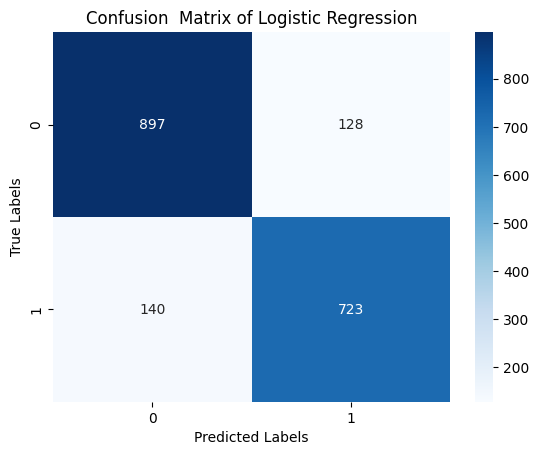

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_pred_te,y_test)

# Define class labels
classes = ['0', '1']

# Create heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion  Matrix of Logistic Regression')
# Show plot
plt.show()

In [ ]:
from xgboost import XGBClassifier

xg= XGBClassifier()

#=== fitting the model ===
xgb = xg.fit(X_train, y_train)

#=== predict the model ===
y_pred_xgb = xg.predict(X_train)
y_pred_test=xg.predict(X_test)



from sklearn import metrics

print()
print("Performances analysis for XGboost")

test_xgb=metrics.accuracy_score(y_train,y_pred_xgb)*100
print( "  Accuracy :",test_xgb,'%')
print()
tr_xgb=metrics.accuracy_score(y_test,y_pred_test)*100



pre_xgb=metrics.precision_score(y_train,y_pred_xgb)*100
print(" Precision :",pre_xgb,'%')
print()
recall_xgb=metrics.recall_score(y_train,y_pred_xgb)*100
print(" Recall :",recall_xgb,'%')
print()

f1_xgb=metrics.f1_score(y_train,y_pred_xgb)*100
print(" F1 score :",f1_xgb,'%')
print()




Performances analysis for XGboost
  Accuracy : 93.19205298013244 %

 Precision : 90.61443066516347 %

 Recall : 94.67020023557126 %

 F1 score : 92.5979262672811 %



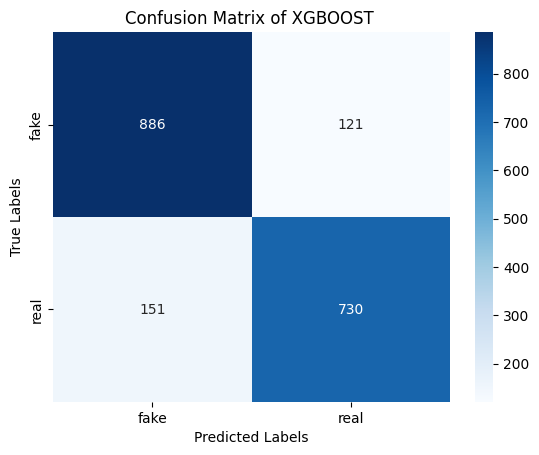

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_pred_test,y_test)

# Define class labels
classes = ['fake', 'real']

# Create heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of XGBOOST ')

# Show plot
plt.show()

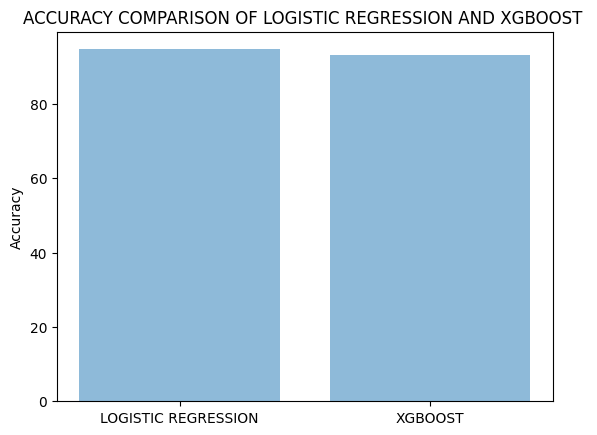

In [ ]:
import numpy as np
objects = ('LOGISTIC REGRESSION', 'XGBOOST')
y_pos = np.arange(len(objects))
performance = [acc_lr,test_xgb]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('ACCURACY COMPARISON OF LOGISTIC REGRESSION AND XGBOOST ')
plt.show()

In [ ]:
 #========================== PREDICTION =================================
pred=int(input("Enter the prediction Index Number:"))

if y_pred_ada[pred]==0:
        print("==========================")
        print()
        print(" The review is fake ")
else:
        print("==========================")
        print()
        print(" The review is real ")

Enter the prediction Index Number:5

 The review is real 


In [ ]:
#========================== PREDICTION =================================

for i in range(0,10):
    if y_pred_xgb[i]==0:
        print("==========================")
        print()
        print(" The review is fake ")
    else:
        print("==========================")
        print()
        print(" The review is real ")


 The review is fake 

 The review is real 

 The review is real 

 The review is fake 

 The review is fake 

 The review is real 

 The review is real 

 The review is fake 

 The review is fake 

 The review is fake 


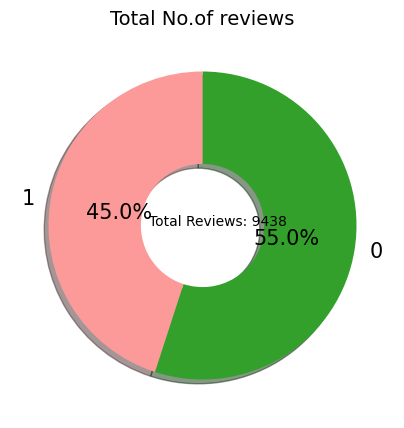

In [ ]:
#pie graph
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
counts =data['Rev_Type'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},autopct='%1.1f%%', pctdistance = 0.55, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.35, y = 0, s = 'Total Reviews: {}'.format(data.shape[0]))
plt.title('Total No.of reviews', fontsize = 14);
plt.show()


------------------- Performance Comparison --------------------




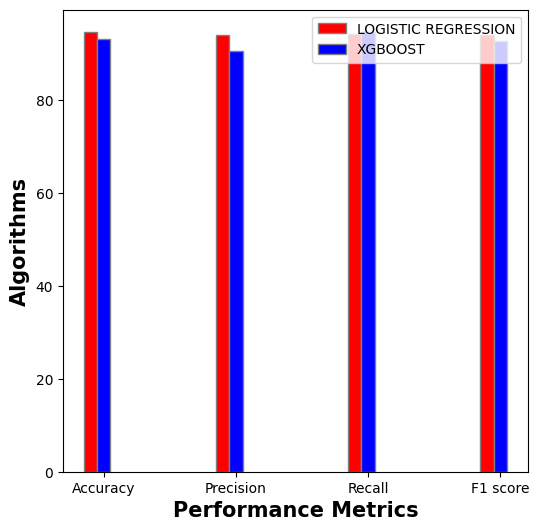

In [ ]:
print()
print("------------------- Performance Comparison --------------------")
print()
print()
import matplotlib.pyplot as plt
barWidth =0.1
fig = plt.subplots(figsize =(6, 6))
lr= [acc_lr,pre_lr,recall_lr,f1_lr]
xg= [test_xgb,pre_xgb,recall_xgb,f1_xgb]

lr=[round(num, 1) for num in lr]
br1 = np.arange(len(lr))
br2 = [x + barWidth for x in br1]


plt.bar(br1, lr, color ='r', width = barWidth,
        edgecolor ='grey', label ='LOGISTIC REGRESSION')
plt.bar(br2, xg, color ='b', width = barWidth,
        edgecolor ='grey', label ='XGBOOST')


plt.xlabel('Performance Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(lr))],
        ['Accuracy', 'Precision','Recall','F1 score'])

plt.legend()
plt.show()